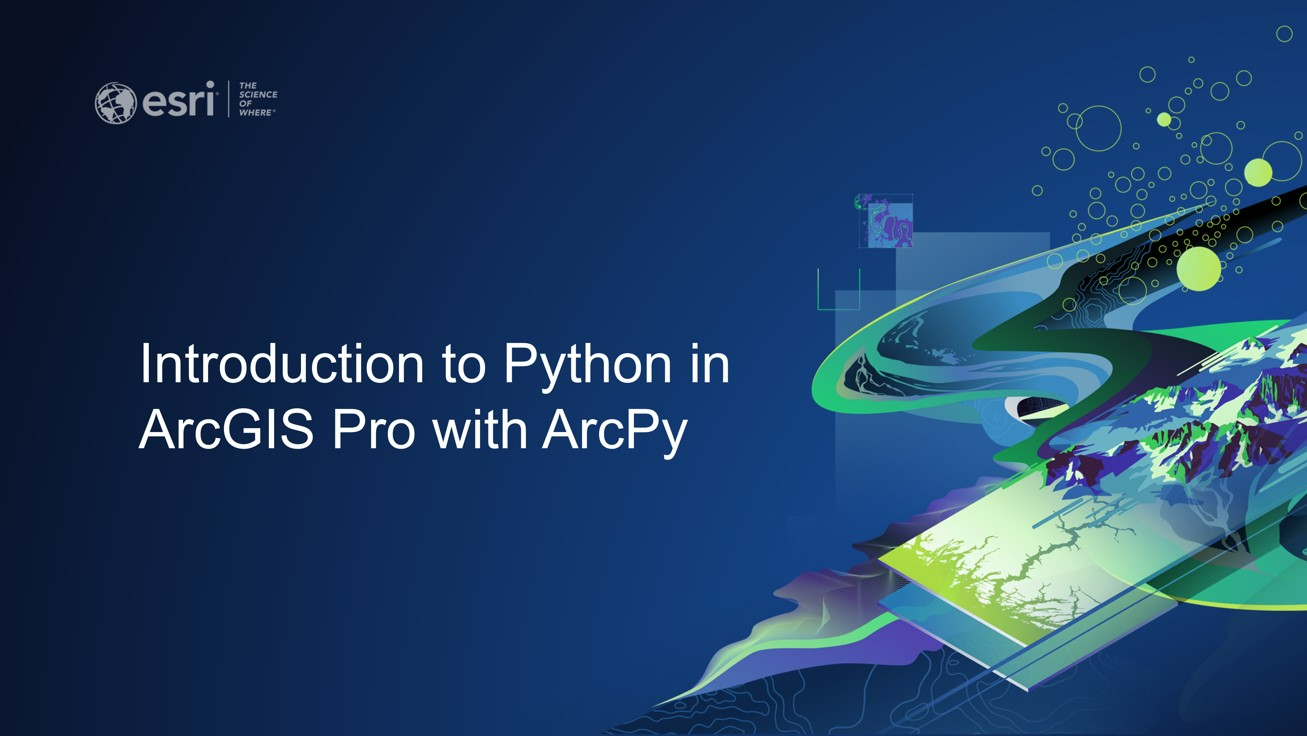

## Introduction to Python in ArcGIS Pro with ArcPy

**Agenda:**
- **Lesson 1: Overview of Python & Notebooks in ArcGIS Pro**
    - Getting to Know ArcPy in ArcGIS Pro with Notebooks
    - Connecting to data & performing light analysis
    
    
- **Lesson 2: Accessing Imagery in the Cloud**
    - Explore cloud-based imagery in ArcGIS Pro
    - ArcGIS Living Atlas, Cloud Storage Connections, and STAC
    
    
- **Lesson 3: A Practical Guide to ArcPy**
    - A Guide to Automating Anything
    
    
- **Lesson 4: Raster Analysis with ArcPy**
    - Kangaroo Island Fire Analysis
    - Working with NumPy Arrays
    
    
- **Lesson 5: Building Reproducible Workflows in ArcGIS Pro**
    - Write Strong Code That Lasts
    - Share workflows with ArcGIS Notebooks, ModelBuilder, and Raster Function Templates

## Lesson 1: Overview of Python & Notebooks in ArcGIS Pro

Python is heavily integrated into ArcGIS Pro. In fact, roughly 99% (only a Sith deals in absolutes!) of the Geoprocessing Tools in ArcGIS Pro are written in Python. Let's take a look at the various ways Python can be used within ArcGIS Pro. To begin, let's explore how ArcGIS Pro manages Python Environments...

Python Environments are a fundamental tool in the realm of research & data science. They enable the ability to create isolated environments that contain different versions of Python and python packages. This is incredibly important because Python and python packages are constantly changing and updating, which may cause dependency issues and ultimately code failure. By being explicit with the version of Python and python packages being used, it's possible to create a Python Environment where the code will consistently work. There are two primary python environment managers, Pip or Conda. ArcGIS Pro comes out of the box with an integrated Conda manager, which we will explore.

<details>
<summary> <b> What is ArcGIS Pro's default Python Environment name? </b> </summary>

arcgispro-py3
</details>

Writing code in Python would be frustrating without a Python Environment to make everything run consistently! But now, let's shift gears and explore how to actually write Python code in ArcGIS Pro. The Python Window is great for quick, simple lines of code. Notebooks are excellent for prototyping and documenting workflows to quickly share with colleagues. And finally, Python Toolboxes are interactive geoprocessing tools meant for custom, repeatable workflows. Each have a purpose, but we'll only explore the Python Window and Notebooks for right now.

<details>
<summary> <b> Which tab in ArcGIS Pro contains the Python Window and Python Notebooks access? </b> </summary>

The Analysis Tab
</details>

Okay, great! We have a trusty Python Environment. We have the tools to actually begin writing Python code... but how do we actually know what to write? Jumping right into coding can be extremely difficult-- and may also be counterproductive! Respect the R&D process and give adequate time to research into whatever it is you're jumping in to. Nowadays, programming languages, software, and individual python packages come with well-written, comprehensive documentation pages. Use them, and learn how to use them effectively! [Why is Reading the Documentation so Important?](https://javascript.plainenglish.io/why-is-reading-the-documentation-so-important-5cf50bab0c9f)

<details>
<summary> <b> Where is ArcPy's documentation? </b> </summary>

<a href='https://pro.arcgis.com/en/pro-app/latest/ArcPy/main/arcgis-pro-ArcPy-reference.htm'> ArcPy Documentation Link </a>
</details>

With our Python Environment setup, Notebook ready, and documentation by our side, we are well on our way to writing solid code! But before we jump right into ArcPy, let's review some of the Python Fundamentals we learned yesterday.

ArcPy is a python package developed by Esri to run ArcGIS Pro's geoprocessing tools. It's comprised of several modules, which are collections of specific functionality. For example, the Image Analysis module will have functions and classes related to analyzing imagery. ArcPy is a tool to programmatically access most of the tools in ArcGIS Pro. With ArcPy, it's also possible to automate complex workflows by stringing geoprocessing tools together for repeated use. Thousands of organizations and individuals are using ArcPy to automate their GIS workflows, speeding up their workflows by placing ArcPy scripts onto ArcGIS Server, or just making complicated workflows more accessible by creating custom geoprocessing tools that are typically more friendly to interact with, rather than code. ArcPy is incredibly powerful because of its versatility!

- **Popular ArcPy Modules**
    - Data Access (arcpy.da)
    - Image Analysis (arcpy.ia)
    - Spatial Analyst (arcpy.sa)
    - Mapping (arcpy.mp)
    - Sharing (arcpy.sharing)

Esri also has a similar, but different python package: ArcGIS API for Python. If you're unfamiliar with ArcGIS products, or even with ArcPy, it may be confusing to see two python packages! To give a really basic explanation, ArcPy is meant to be used for desktop applications, like ArcGIS Pro. Meanwhile, the ArcGIS API for Python is meant to be used for cloud applications, like ArcGIS Online or ArcGIS Enterprise. They both serve their own individual purprose, and one isn't necessarily "better" than the other. They have a lot of overlapping funcitonality, and they work best when used properly together. 

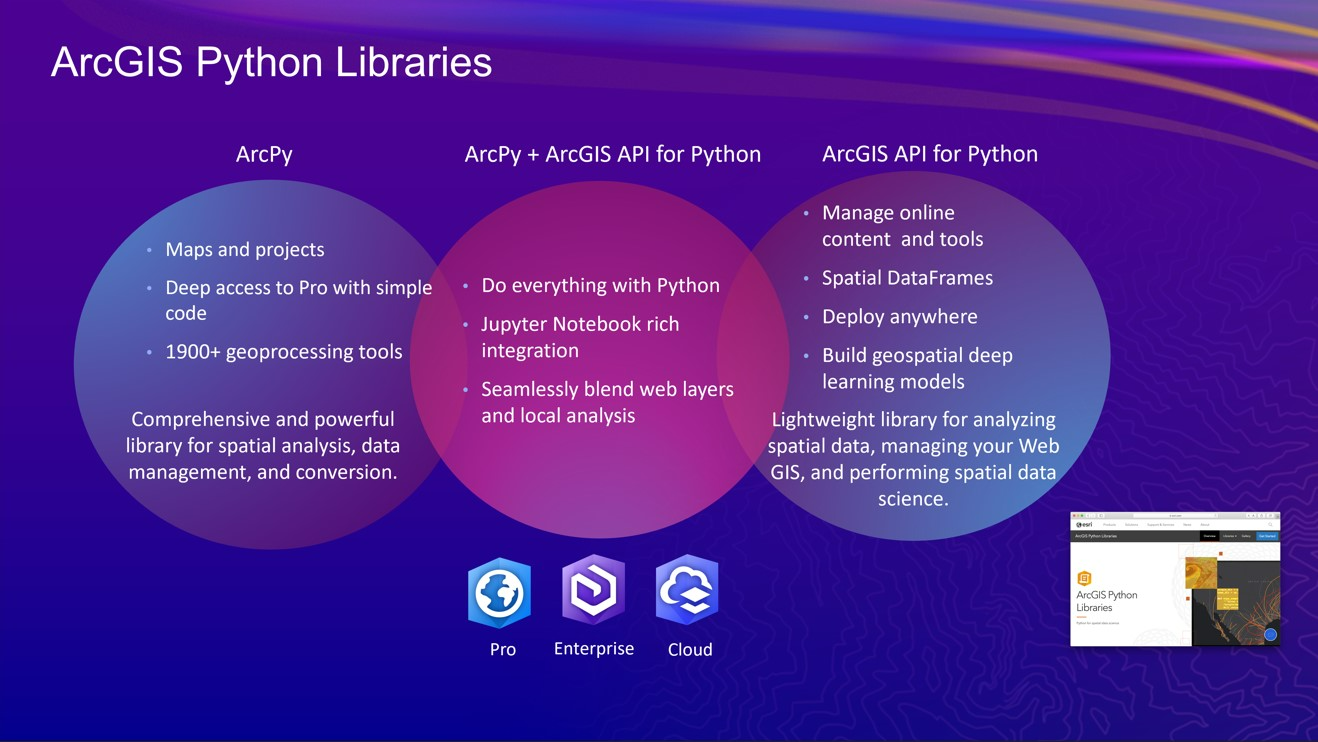

### ArcPy Example

In [ ]:
import arcpy

# Using the mapping module, create a Project Object from the CURRENT project
aprx = arcpy.mp.ArcGISProject("CURRENT")

# From the Project Object, find & select the Introducing ArcPy Map
m = aprx.listMaps("Introducing ArcPy Map")[0]

# Add the Trailhead_Styled layer to the Introducing ArcPy Map
m.addDataFromPath("https://services3.arcgis.com/GVgbJbqm8hXASVYi/arcgis/rest/services/Trailheads_Styled/FeatureServer")

### ArcGIS API for Python Example

In [ ]:
import arcgis

# Authenticate to ArcGIS Online via Pro
gis = arcgis.gis.GIS("Pro")
gis.users.me

In [ ]:
# Get the Trailheads_Styled layer via the Item's ID
trailheads_item = gis.content.get("2e4b3df6ba4b44969a3bc9827de746b3")
trailheads_item

In [ ]:
# Create a web_map and add the Trailheads_Styled layer to the map
web_map = gis.map("Malibu, CA")
web_map.content.add(trailheads_item)
web_map

## Lesson 2: Accessing Imagery in the Cloud

The cloud has revolutionized the software industry and how organizations think about distributing their data. Web Services in particular have greatly increased data accessibility & usability. And in the field of remote sensing, Image Services have been critical to enabling scalable access & analysis to imagery products.

An **Image Service** is a type of web service that allows you to store, manage, and distribute large collections of imagery over the internet. Image Services allow end-users to stream the imagery directly to their client, without the need to download anything. This reduces the barrier-to-entry & data redundancy as most of the heavy-lifting is done on the server's hardware, as opposed to the client's hardware. In ArcGIS Pro, it's possible to connect to any publicly available Image Service from an organization. Alternatively, users can connect to the curated content within the ArcGIS Living Atlas.

The **ArcGIS Living Atlas of the World** is the foremost collection of geographic information from around the globe. It includes maps, apps, and data layers to support your work.

Another strategy for making data available via the cloud is to store imagery in publicly available services like **Amazon S3 Buckets**, **Microsoft Azure Blob Storage**, or **Google Cloud Storage**.

And finally with **STAC Connections** being available in ArcGIS Pro 3.2, it's now easier than ever to access imagery stored in publicly available repositories. STAC stands for Spatio-Temporal Asset Catalog, and it's an excellent way for filtering image catalogs down by location, time, sensor information, and other useful metadata like cloud cover percentage.

## Lesson 3: A Practical Guide to ArcPy

So, how do people actually use ArcPy? It's very rare to see people jump right into code. And again, jumping in too early may leave you worse for wear in the long run. Instead, it's advised to take time to plan your workflow out, test out small subsets of the problem, and then automate the larger process when testing is complete. In general, it's good to follow these steps:

- **Start small**
    - This will help you identify potential problems 
    
- **Run through your entire workflow using Geoprocessing Tools**
    - This sanity check will validate your workflow, before you code 
    
- **Select "Copy Python Command" on each tool**
    - Avoid syntax issues & headaches 
    
- **Paste the result into an ArcGIS Notebook**
    - Notebooks are great for testing-as-you-go 
    
- **Make the inputs/outputs relative**
    - Relative paths allow for portable code 
    
- **Run as needed**

And if there are any hiccups, then try to use ModelBuilder! It's a visual coding tool to help out stringing together a series of Geoprocessing Tools.

## Lesson 4: Raster Analysis with ArcPy

In its simplest form, a raster consists of a matrix of pixels (or cells) organized into rows and columns (or a grid) in which each pixel contains a value representing information, such as image reflectance or temperature. Rasters are digital images collected by aircraft, drones, satellites, ground and water-based sensors, digital pictures, and scanned maps.

ArcGIS Pro contains many tools and raster functions that work with imagery and raster data. Regardless of whether your pixel-based data is an image from a satellite, an aerial sensor, a raster dataset, or a DEM, there are many ways that you can work with this data when performing analysis. If the data you are displaying is satellite imagery, it's likely supported as a raster product within ArcGIS. Raster products have a few different templates with various band operations already performed on the fly as you roam or zoom into the image.

In ArcPy, we perform imagery analysis and management workflows by working with Raster Objects.

A Raster Object is an object that references a raster dataset.

A Raster Object can be created in three ways: by supplying the path to an existing raster on disk, by supplying a RasterInfo object, or it can be the result of any Map Algebra statement that results in a raster output. We'll explore how to create a Raster Object, access its properties and metadata, and perform analysis.

## Lesson 5: Building Reproducible Workflows in ArcGIS Pro

Python is a fundamental tool for building reproducible workflows. And whether you're a researcher, GIS manager, or just simply trying to use a tool that someone else built, reproducibility is a luxury we should all attempt to achieve. It allows others to access the work and science that was previously performed, which then opens the door for further research and development. In short, reproducible workflows provide an entry-point for expanding upon the work and science that you create.

Esri is actively developing workflows to enhance reproducibility (where results can be continually reproduced using the same data and methods) and replicability (a higher level of scientific rigor where results can be reproduced using different samples of data and different software). We are involved in several open science initiatives along these lines and are a signatory to the Coalition for Publishing Data in the Earth and Space Sciences (COPDESS) Commitment to Enabling FAIR (Findable, Accessible, Interoperable, Reusable) Data in the Earth, Space, and Environmental Sciences. 
[A Five-Star Guide for Achieving Replicability and Reproducibility When Working with GIS Software and Algorithms](https://www.tandfonline.com/doi/full/10.1080/24694452.2020.1806026?scroll=top&needAccess=truef)

Here are some examples of how the ArcGIS system enables reproducible workflows & open-science: <br>
- **ArcGIS Pro Project Packages** are a method for sharing data, analysis history, and project metadata to other users with ArcGIS Pro.
- **ArcGIS Online/Enterprise** are platforms that allow users to share and access data across the web in common geographic formats that are OGC-compliant.
- **ArcGIS Notebooks** are a method for users to share and document their workflows with Python or R. Notebooks are integrated locally with ArcGIS Pro, or via the cloud with ArcGIS Online/Enterprise.
- **ArcGIS ModelBuilder** is a tool for creating custom geoprocessing workflows. It's a "code-less" option that features a visual code builder.
- **ArcGIS Custom Geoprocessing Tools** are tools for creating custom geoprocessing workflows. It's a "code-intensive" option, allowing for complete access to Python and the GUI.
- **Raster Function Templates** is a tool, similar to ModelBuilder, for creating custom raster analytical workflows. It's a "code-less" option that features a visual code builder. Raster Functions are fast, ephemeral tools that perform analysis directly on the pixels. They can be attached & shared to image services to provide different configurations of an Image Service.